In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr, t

In [61]:
df = pd.read_csv('./Datasets/Auto MPG.csv')
# Converting horsepower column to numeric value
df = df.replace('?', np.nan)
df = df.dropna()
df['horsepower'] = pd.to_numeric(df['horsepower'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504.0,12.0,70.0,1.0
1,15.0,8,350.0,165,3693.0,11.5,70.0,1.0
2,18.0,8,318.0,150,3436.0,11.0,70.0,1.0
3,16.0,8,304.0,150,3433.0,12.0,70.0,1.0
4,17.0,8,302.0,140,3449.0,10.5,70.0,1.0


In [62]:
df.shape

(392, 8)

a. For discrete attributes, apply a one-hot encoding, and for non numeric ordinal
attributes, apply integer mapping. Handle outliers/noise and save this in a file.

In [63]:
discrete_columns = ['origin','cylinders']
onehotencoding = OneHotEncoder(drop='first',sparse=False)
encoded = pd.DataFrame(onehotencoding.fit_transform(df[discrete_columns]))

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    float64
 7   origin        392 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.6 KB


There are no non-numeric attributes in the data and hence, we skip the integer mapping.

In [65]:
outliers_idx = set()

In [66]:
outlier_cols = []

In [67]:
# If a value lies outside of the normal distribution of the data, then it is classified as an outlier
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if outliers.size != 0:
        outliers_idx.update(outliers.index.tolist())
        outlier_cols.append(column)
        print(f"No of outliers in {column} is {outliers.shape[0]}")

No of outliers in horsepower is 10
No of outliers in weight is 1
No of outliers in acceleration is 11
No of outliers in model year is 1


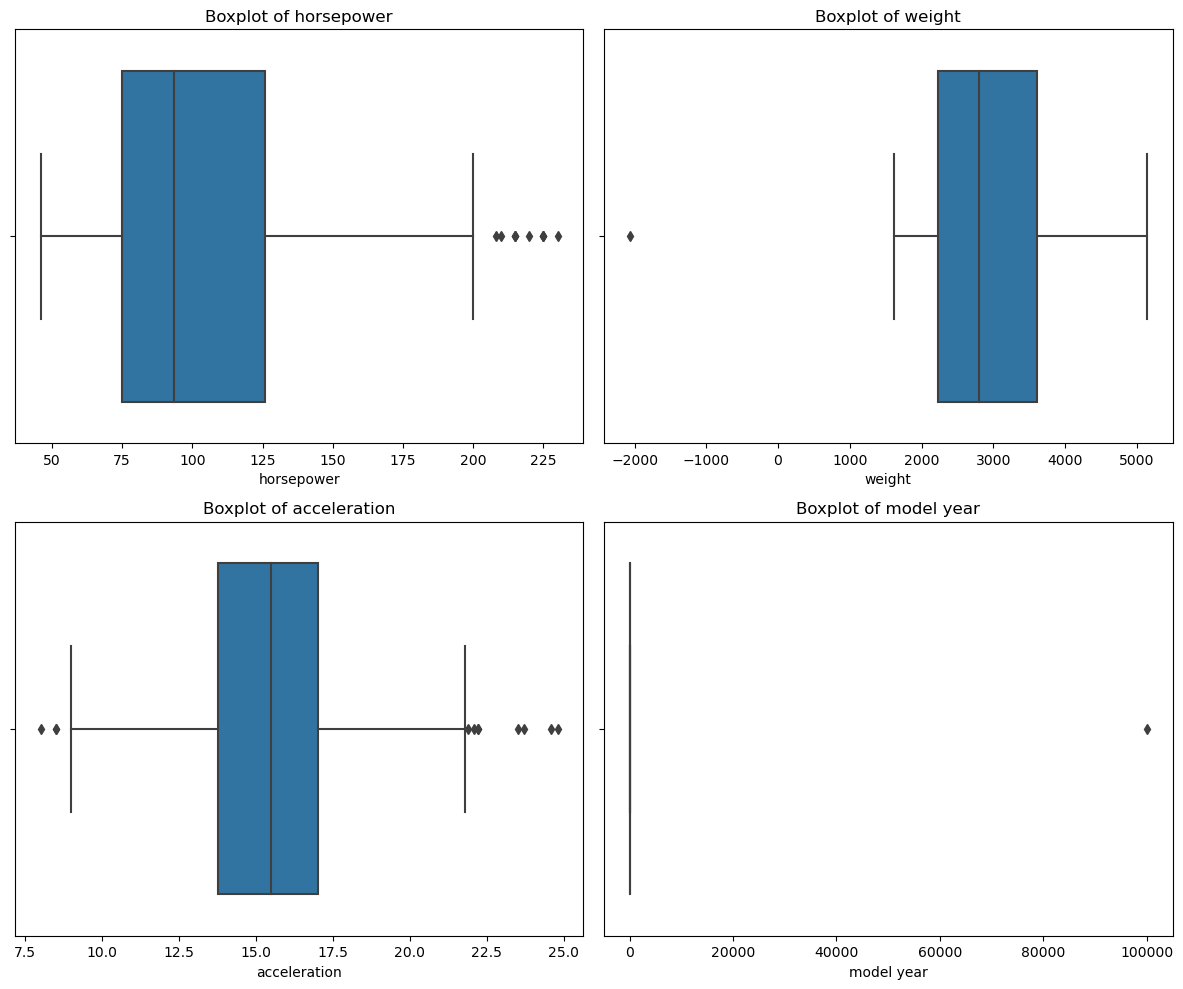

In [68]:
# Visualizing the outliers using boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, feature in enumerate(outlier_cols):
    sns.boxplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.savefig('./plots/outliers.png')
plt.show()

In [69]:
# Dropping the outlier index from the data
if outliers_idx:
    df = df.drop(outliers_idx)
    print(f"Dropped {len(outliers_idx)} outlier rows.")
else:
    print("No outliers found.")
df.reset_index(drop=True, inplace=True)

Dropped 22 outlier rows.


In [70]:
df.shape

(370, 8)

In [71]:
df.to_csv('./Datasets/cleaned_MPG.csv',index=False)
print("Updated data saved")

Updated data saved


b. Use the file you have saved in (a) and compute the mean  ̄x and variance σ2 of the data in it.

In [72]:
def mean_of_data(column):
    total = 0
    for i in column:
        total += i
    return total/len(column)

def variance_of_data(column):
    mean = mean_of_data(column)
    total = 0
    for i in column:
        total += (i - mean)**2
    return total/len(column)

In [73]:
df = pd.read_csv('./Datasets/cleaned_MPG.csv')

In [74]:
for column in df.columns:
    print(f"Mean of {column} is {mean_of_data(df[column])}")
    print(f"Variance of {column} is {variance_of_data(df[column])}")
    print()


Mean of mpg is 23.612702702702705
Variance of mpg is 58.109108911614285

Mean of cylinders is 5.418918918918919
Variance of cylinders is 2.7947772096420787

Mean of displacement is 189.45810810810812
Variance of displacement is 9721.307028853184

Mean of horsepower is 102.03513513513514
Variance of horsepower is 1131.5906574141727

Mean of weight is 2948.6486486486488
Variance of weight is 685624.9089846608

Mean of acceleration is 15.549189189189175
Variance of acceleration is 5.783688531775025

Mean of model year is 76.11351351351351
Variance of model year is 13.089817384952534

Mean of origin is 1.5945945945945945
Variance of origin is 0.6680788897005152



In [75]:
# Verifying our output
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,23.612703,5.418919,189.458108,102.035135,2948.648649,15.549189,76.113514,1.594595
std,7.633255,1.674022,98.730198,33.684675,829.145929,2.408187,3.622884,0.818468
min,9.000000,3.000000,68.000000,46.000000,1613.000000,9.500000,70.000000,1.000000
25%,17.600000,4.000000,105.000000,76.000000,2223.750000,14.000000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,92.500000,2781.500000,15.500000,76.000000,1.000000
75%,29.000000,6.000000,258.000000,120.000000,3556.000000,17.000000,79.000000,2.000000
max,46.600000,8.000000,429.000000,200.000000,5140.000000,21.800000,82.000000,3.000000


c. Normalize each feature of the saved data with its mean and variance. Now compute the variance of the normalized data.

In [76]:
def normalize_feature():
    for column in df.columns:
        mean = mean_of_data(df[column])
        variance = variance_of_data(df[column])
        standard_dev = variance**0.5
        df[column] = (df[column] - mean) / standard_dev

In [77]:
normalize_feature()

In [78]:
for column in df.columns:
    print(f"Variance of {column} is {variance_of_data(df[column])}")
    print()

Variance of mpg is 1.0000000000000004

Variance of cylinders is 1.000000000000005

Variance of displacement is 0.9999999999999983

Variance of horsepower is 0.9999999999999996

Variance of weight is 0.9999999999999996

Variance of acceleration is 0.9999999999999993

Variance of model year is 0.9999999999999993

Variance of origin is 0.9999999999999941



In [79]:
# Verifying the output
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,3.700000e+02,3.700000e+02,3.700000e+02,370.000000,3.700000e+02,3.700000e+02,3.700000e+02,3.700000e+02
mean,-3.456694e-16,-3.072617e-16,-1.344270e-16,0.000000,-1.536309e-16,6.010807e-15,9.217852e-16,1.248251e-16
std,1.001354e+00,1.001354e+00,1.001354e+00,1.001354,1.001354e+00,1.001354e+00,1.001354e+00,1.001354e+00
min,-1.916940e+00,-1.446931e+00,-1.231868e+00,-1.665773,-1.613054e+00,-2.515329e+00,-1.689756e+00,-7.274566e-01
25%,-7.887650e-01,-8.487582e-01,-8.566019e-01,-0.773954,-8.754553e-01,-6.441722e-01,-8.605656e-01,-7.274566e-01
50%,-8.037624e-02,-8.487582e-01,-4.407664e-01,-0.283454,-2.018643e-01,-2.045348e-02,-3.137479e-02,-7.274566e-01
75%,7.067224e-01,3.475867e-01,6.951744e-01,0.534047,7.334942e-01,6.032653e-01,7.978160e-01,4.959931e-01
max,3.015545e+00,1.543932e+00,2.429513e+00,2.912230,2.646481e+00,2.599165e+00,1.627007e+00,1.719443e+00


d. In the given dataset, with a 5% level of significance, test if the number model year has any effect on the number of cylinders.

We define our hypothesis as follows: <br>
- H0: There is no significant correlation<br>
- H1: There is significant correlation between the features

In [80]:
df = pd.read_csv('./Datasets/cleaned_MPG.csv')

In [81]:
# Using inbuilt libraries
model_year = df['model year']
num_cylinders = df['cylinders']
correlation, p_value = pearsonr(model_year, num_cylinders)
print(f"Pearson correlation: {correlation}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")

Pearson correlation: -0.30769574790499443
P-value: 1.485599280014524e-09
Reject the null hypothesis: Significant correlation.


In [82]:
# From scratch
alpha = 0.05
n = df.shape[0]
r = np.corrcoef(df["model year"], df["cylinders"])[0, 1]
t_value = r / np.sqrt((1 - r**2) / (n - 2))
print("The value of t is", t_value)

The value of t is -6.203596592141491


In [83]:
degrees = n-2

critical_value = t.ppf(1 - alpha/2, degrees)

# Print the critical value
print(f"The critical value is: {critical_value:.3f}")

The critical value is: 1.966


In [84]:
if (t_value < critical_value):
    print("Reject the null hypothesis: Significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")

Reject the null hypothesis: Significant correlation.
